In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression

%matplotlib inline 

In [4]:
df = pd.read_csv('/Users/rayanesahi/Downloads/EPL_20_21.csv')

df

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,Lys Mousset,Sheffield United,FRA,"FW,MF",24,11,2,296,0,0,50,80.0,0,0,0.22,0.10,0,0
528,Jack O'Connell,Sheffield United,ENG,DF,26,2,2,180,0,0,77,77.9,0,0,0.00,0.00,0,0
529,Iliman Ndiaye,Sheffield United,FRA,MF,21,1,0,12,0,0,3,100.0,0,0,0.00,0.00,0,0
530,Antwoine Hackford,Sheffield United,ENG,"DF,FW",16,1,0,11,0,0,1,100.0,0,0,1.16,0.00,0,0


In [5]:
df['Goals'].describe()

count    532.000000
mean       1.853383
std        3.338009
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max       23.000000
Name: Goals, dtype: float64

In [6]:
df[df['Goals']==df['Goals'].max()]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
162,Harry Kane,Tottenham Hotspur,ENG,FW,27,35,35,3082,23,14,937,70.1,4,4,0.6,0.22,1,0


In [7]:
df[df['Assists']==df['Assists'].max()]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
162,Harry Kane,Tottenham Hotspur,ENG,FW,27,35,35,3082,23,14,937,70.1,4,4,0.6,0.22,1,0


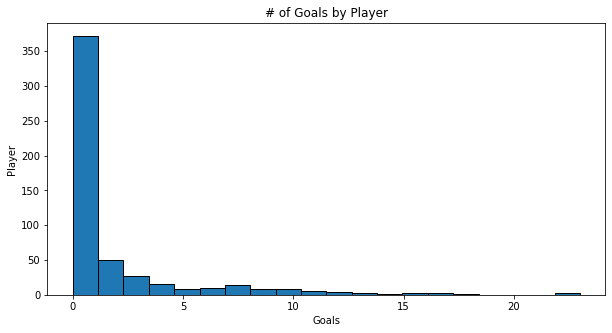

In [8]:
df['Goals'].plot(kind='hist', bins=20, figsize=(10,5), ec="black")
plt.xlabel('Goals')
plt.ylabel('Player')
plt.title('# of Goals by Player')
plt.show()

Text(0.5, 1.0, 'Correlation Graph of the Dataset')

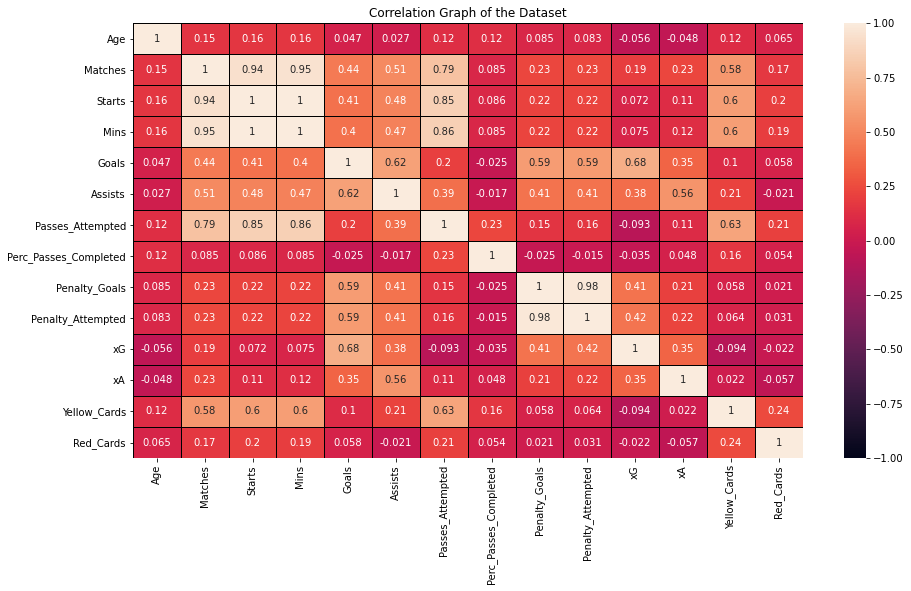

In [17]:
plt.figure(figsize=(15, 8))
correlation = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, linewidths=1, linecolor='black')
correlation.set_title('Correlation Graph of the Dataset')

Pearsons correlation: 0.394


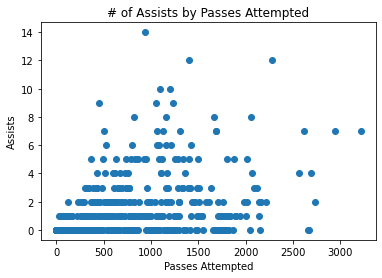

In [10]:
plt.scatter(df['Passes_Attempted'], df['Assists'])
plt.xlabel('Passes Attempted')
plt.ylabel('Assists')
plt.title('# of Assists by Passes Attempted')
#pearson coefficient
corr, _ = pearsonr(df['Passes_Attempted'], df['Assists'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.228


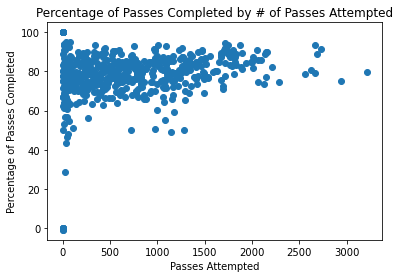

In [11]:
plt.scatter(df['Passes_Attempted'], df['Perc_Passes_Completed'])
plt.xlabel('Passes Attempted')
plt.ylabel('Percentage of Passes Completed')
plt.title('Percentage of Passes Completed by # of Passes Attempted')
#pearson coefficient
corr, _ = pearsonr(df['Passes_Attempted'], df['Perc_Passes_Completed'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.228


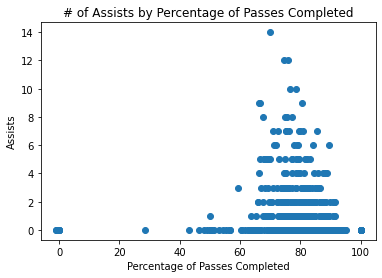

In [12]:
plt.scatter(df['Perc_Passes_Completed'], df['Assists'])
plt.xlabel('Percentage of Passes Completed')
plt.ylabel('Assists')
plt.title('# of Assists by Percentage of Passes Completed')
#pearson coefficient
corr, _ = pearsonr(df['Passes_Attempted'], df['Perc_Passes_Completed'])
print('Pearsons correlation: %.3f' % corr)

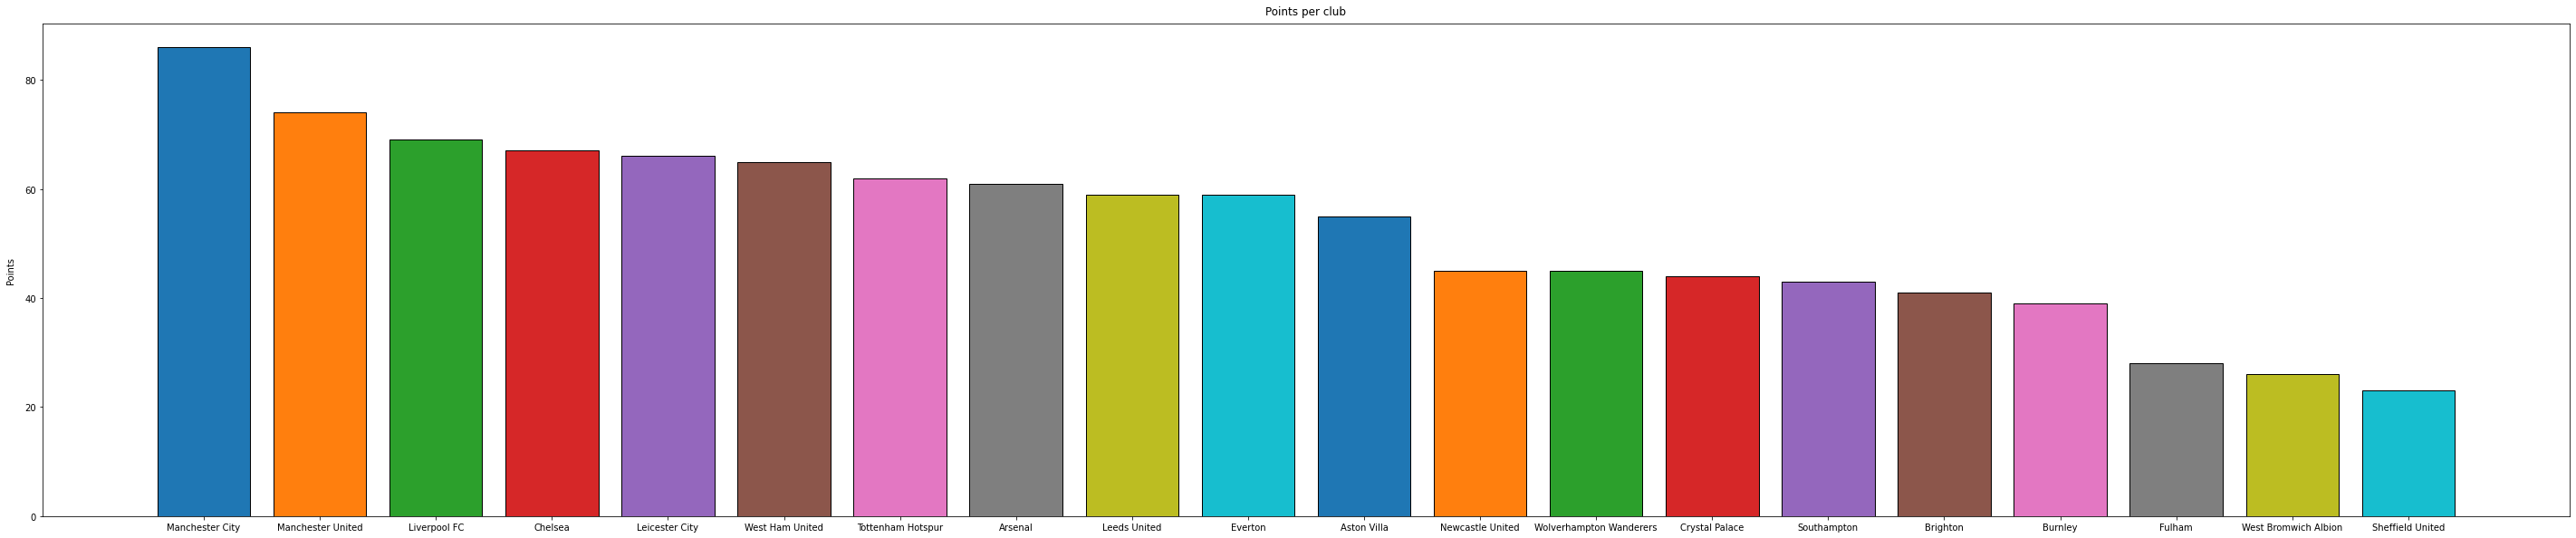

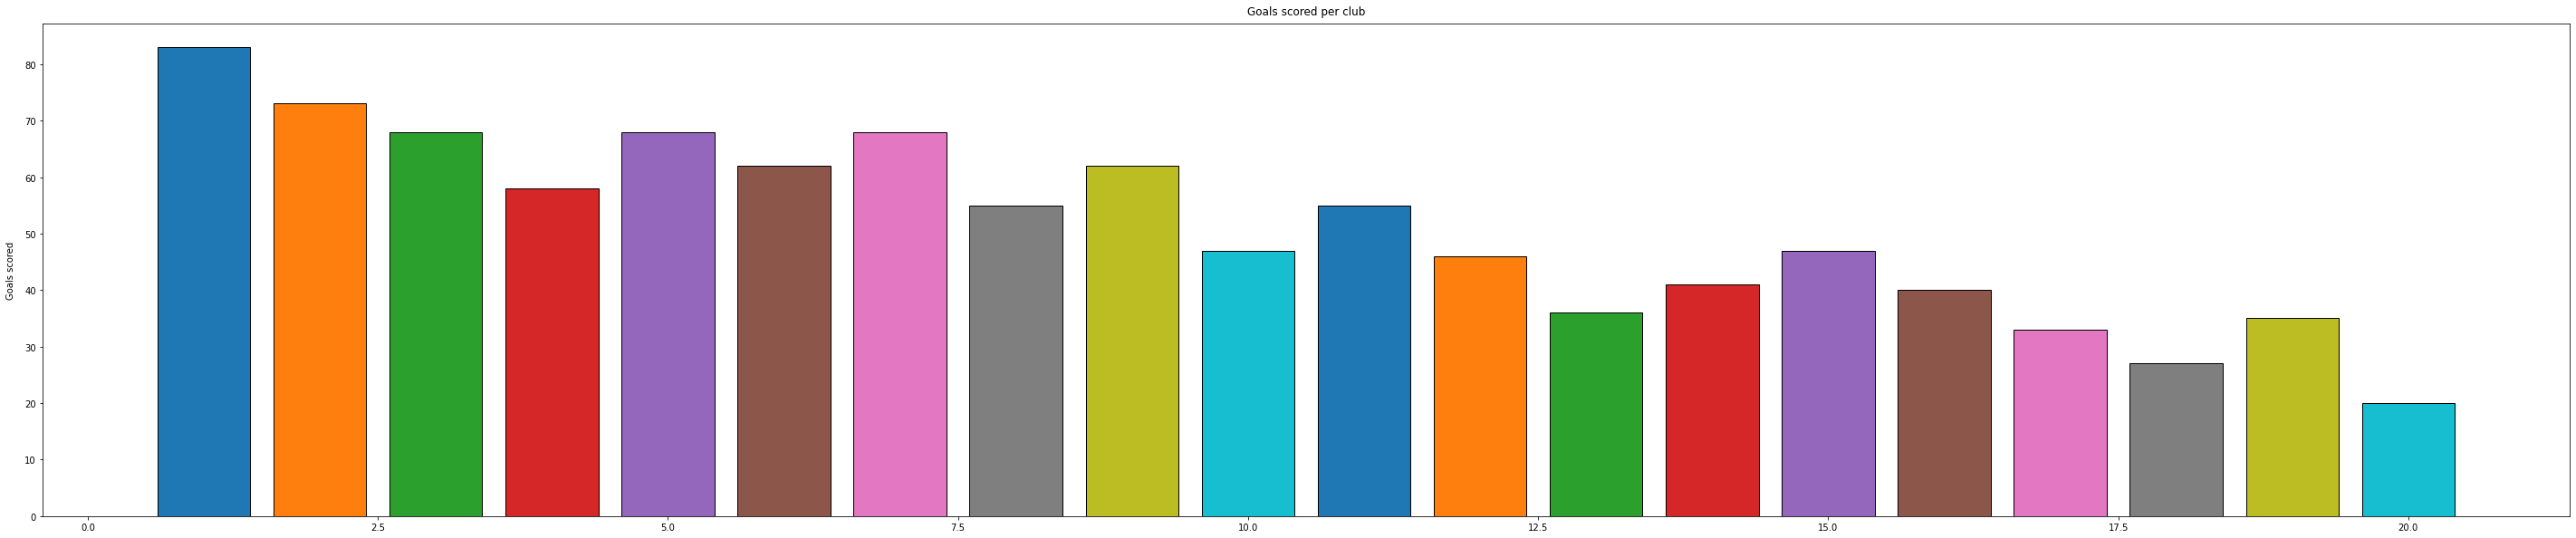

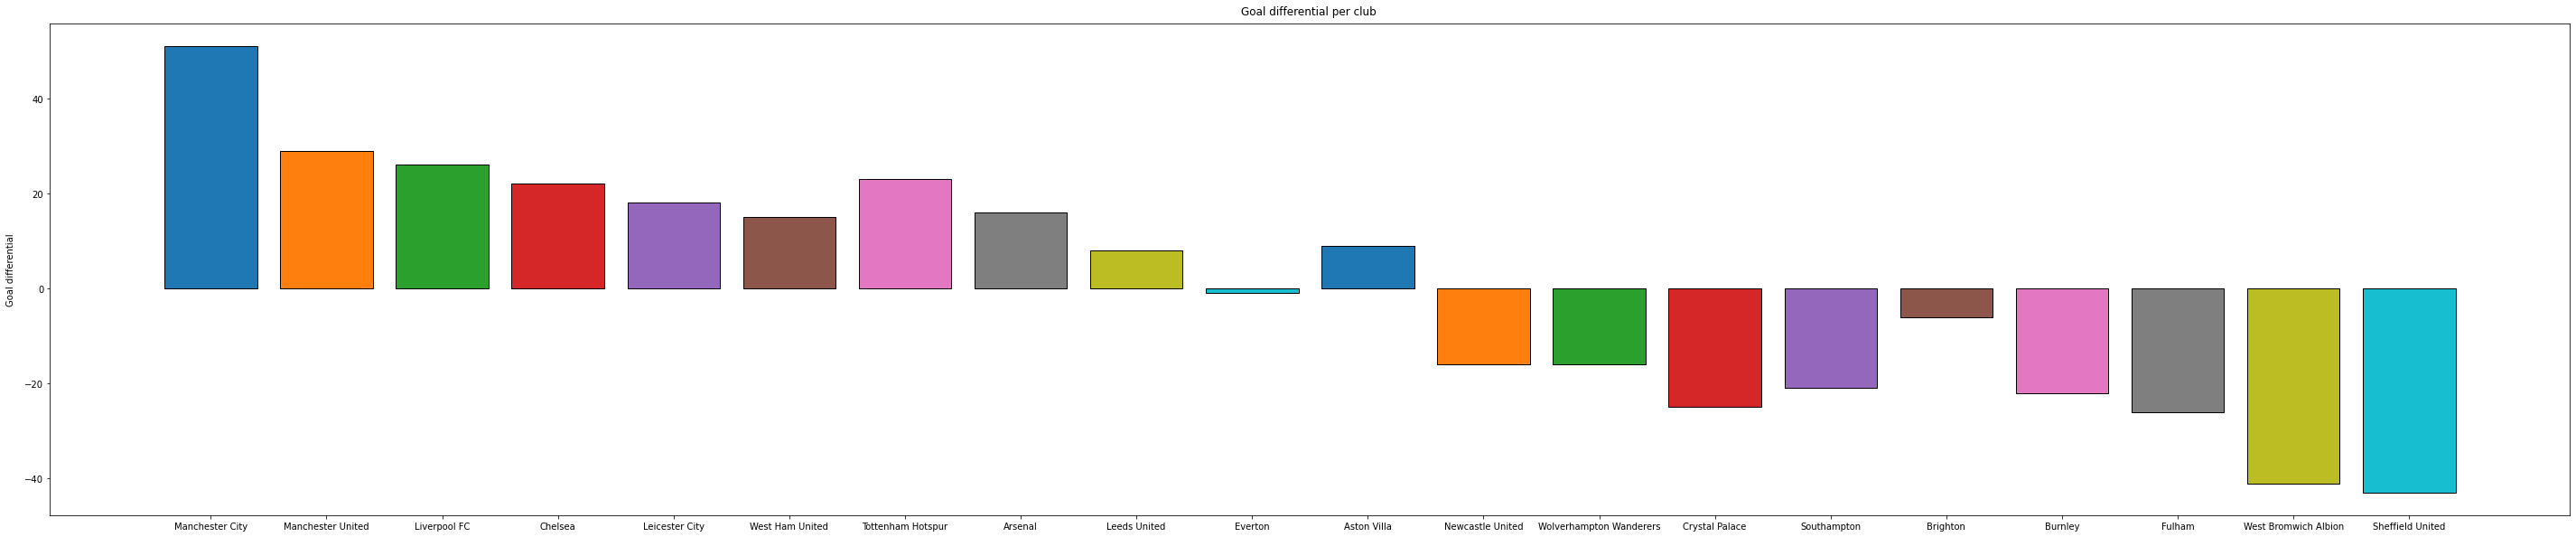

Pearsons correlation: -0.979


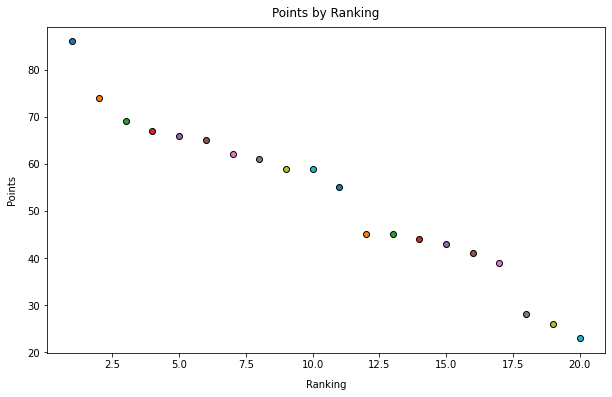

Pearsons correlation: -0.944


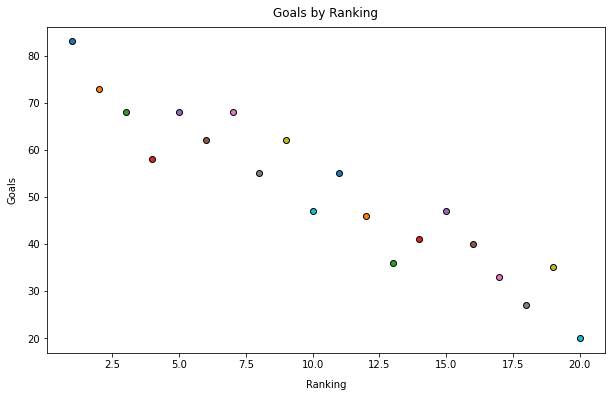

Pearsons correlation: 0.761


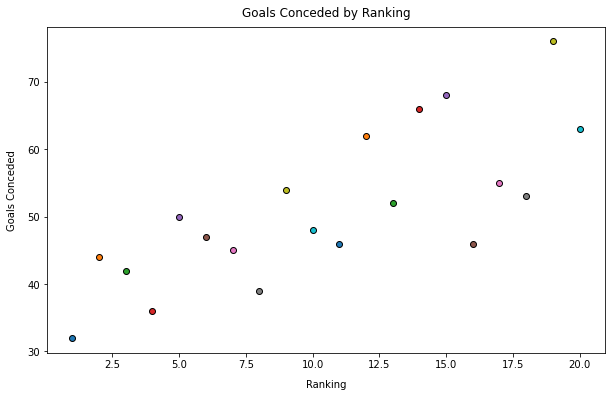

Pearsons correlation: -0.954


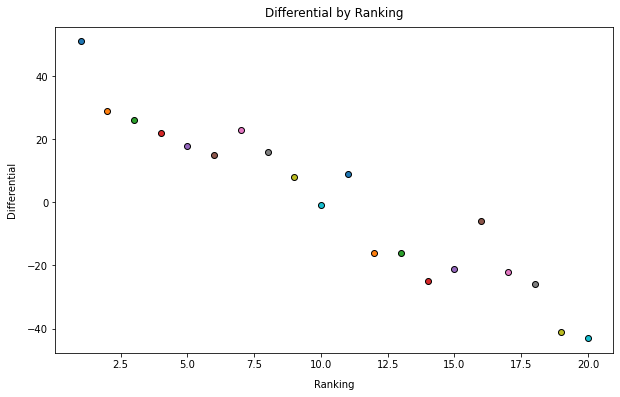

Pearsons correlation: -0.874
[[165.05]
 [235.9 ]
 [906.  ]
 [233.75]] [15.7455319  14.38674784  1.53535482 14.42798123]


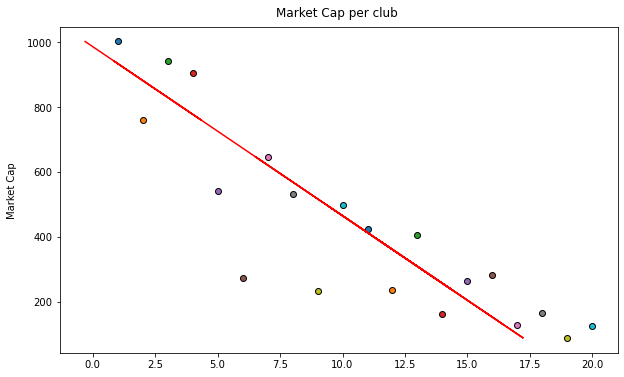

In [34]:
#run correlation 
pos = {
    1:	('Manchester City', '86	83	32	+51'),
    2:	('Manchester United', '74  73	44	+29'),
    3:	('Liverpool FC', '69	68	42	+26'),
    4:	('Chelsea',	'67	58	36	+22'),
    5:	('Leicester City',	'66	68	50	+18'),
    6:	('West Ham United',	'65  62	47	+15'),
    7:	('Tottenham Hotspur', '62	68	45	+23'),
    8:	('Arsenal',	'61	55	39	+16'),
    9:	('Leeds United', '59	62	54	+8'),
    10:	('Everton',	'59  47	48	-1'),
    11:	('Aston Villa',	'55	55	46	+9'),
    12:	('Newcastle United', '45	46	62	-16'),
    13:	('Wolverhampton Wanderers',	'45	36	52	-16'),
    14:	('Crystal Palace',	'44	41	66	-25'),
    15:	('Southampton',	'43	47	68	-21'),
    16:	('Brighton', '41	40	46	-6'),
    17:	('Burnley', '39	33	55	-22'),
    18:	('Fulham', '28	27	53	-26'),
    19:	('West Bromwich Albion', '26 35	76 -41'),
    20:	('Sheffield United', '23 20	63	-43'),
}

mrktCap = {
    'Manchester City' : 1002,
    'Chelsea' : 906.00,
    "Liverpool FC" : 941.50,
    'Manchester United'	: 760.25,
    'Tottenham Hotspur'	: 647.00,
    'Leicester City' : 541.10,	
    'Arsenal' : 531.30,
    'Everton' : 496.50,	
    "Aston Villa" : 424.30,	
    "Wolverhampton Wanderers" : 404.35,
    "Brighton" : 281.3,
    'West Ham United' : 272.75,	
    'Southampton' : 262.40,	
    'Leeds United' : 233.75,
    'Newcastle United' : 235.90,
    'Crystal Palace' : 163.03,
    'Fulham' : 165.05,	
    "West Bromwich Albion"	: 87.65,	
    'Burnley' : 128.13,	
    'Sheffield United' : 125.6	
}


fig, ax = plt.subplots(figsize=(50, 10))
plt.ylabel("Points", labelpad=10)
plt.title('Points per club', pad=10)

for place in pos:
    club = (pos[place][0])
    stats = pos[place][1].split()
    points = int(stats[0])
    plt.bar(club, points, ec='black')
plt.show()

fig, ax = plt.subplots(figsize=(50, 10))
plt.ylabel("Goals scored", labelpad=10)
plt.title('Goals scored per club', pad=10)

for place in pos:
    club = (pos[place][0])
    stats = pos[place][1].split()
    goals = int(stats[1])
    plt.bar(place, goals, ec='black')
plt.show()

fig, ax = plt.subplots(figsize=(50, 10))
plt.ylabel("Goal differential", labelpad=10)
plt.title('Goal differential per club ', pad=10)

for place in pos:
    club = (pos[place][0])
    stats = pos[place][1].split()
    dif = int(stats[-1])
    plt.bar(club, dif, ec='black')
plt.show()

# ---------------------------------------------------
# scatter 

def scatter(y):
    x='Ranking'
    st = {
        'Points':0,
        'Goals':1,
        'Goals Conceded':2,
        'Differential':-1
    }
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel(x, labelpad=10)
    plt.ylabel(y, labelpad=10)
    plt.title(f'{y} by {x}', pad=10)

    perX = [i for i in range(20)]
    perY = []

    for place in pos:
        stats = pos[place][1].split()
        stat = st[y]
        points = int(stats[stat])
        plt.scatter(place, points, ec='black')
        perY.append(points)
    #pearson coefficient
    corr, _ = pearsonr(perX, perY)
    print('Pearsons correlation: %.3f' % corr)

    plt.show()

scatter('Points')
scatter('Goals')
scatter('Goals Conceded')
scatter('Differential')

#marketcap
ig, ax = plt.subplots(figsize=(10, 6))
plt.ylabel("Market Cap", labelpad=10)
plt.title('Market Cap per club ', pad=10)
perX = []
perY = []
for place in pos:
    club = (pos[place][0])
    plt.scatter(place, mrktCap[club], ec='black')
    perX.append(place)
    perY.append(mrktCap[club])
corr, _ = pearsonr(perX, perY)
print('Pearsons correlation: %.3f' % corr)

#make linear regression model
# print(perX, perY)
X = np.array(perY).reshape(-1, 1)
y = np.array(perX)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)

forecast_predicted = clf.predict(X_test)
print(X_test, forecast_predicted)

forecast_predicted = clf.predict(X)

plt.plot(forecast_predicted, X, color='red')
plt.show()


{'GUI': 0, 'GRE': 0, 'AUT': 0, 'BIH': 0, 'ZIM': 0, 'CAN': 0, 'IRN': 0, 'MTN': 0, 'SKN': 0, 'MKD': 2, 'MEX': 4, 'BFA': 7, 'CRO': 9, 'UKR': 9, 'RSA': 9, 'COD': 9, 'SVK': 9, 'MAR': 10, 'URU': 10, 'CMR': 10, 'JPN': 10, 'PAR': 10, 'MLI': 10, 'JAM': 12, 'ISL': 12, 'NZL': 12, 'NOR': 13, 'SRB': 14, 'GAB': 14, 'AUS': 14, 'SEN': 15, 'DEN': 15, 'ALG': 15, 'SWE': 15, 'TUR': 15, 'SUI': 15, 'NIR': 15, 'GHA': 15, 'POL': 15, 'COL': 15, 'ITA': 16, 'USA': 16, 'ARG': 16, 'CIV': 16, 'NGA': 16, 'CZE': 16, 'GER': 17, 'BEL': 17, 'NED': 17, 'WAL': 17, 'KOR': 17, 'ENG': 18, 'ESP': 18, 'FRA': 18, 'BRA': 18, 'SCO': 18, 'POR': 18, 'IRL': 18, 'EGY': 19, 'reverse': True}


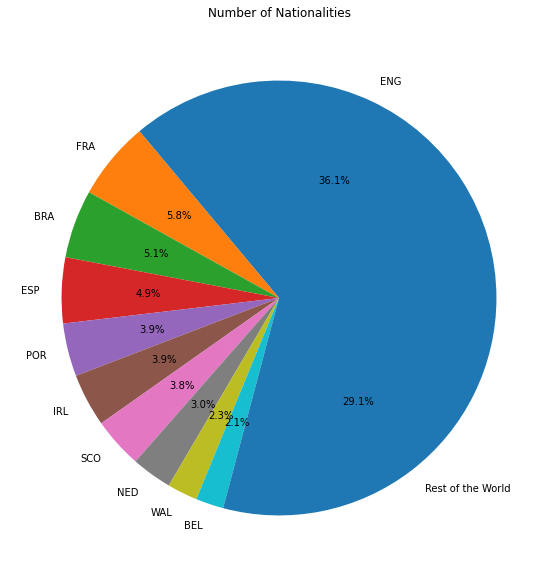

In [28]:
fig, ax = plt.subplots(figsize=(40, 10))
plt.title('Number of Nationalities', pad=10)

clubGoals = {}

for x in df['Nationality']:
    if x in clubGoals:
        clubGoals[x] += 1
    else:
        clubGoals[x] = 1
        
clubGoals = dict(sorted(clubGoals.items(), key=lambda item: item[1], reverse=True))

freq = []
rest = 0
ct = 0

for x in clubGoals:
    if ct < 10:
        freq.append(clubGoals[x])
    else:
        rest += clubGoals[x]
    ct += 1
freq.append(rest)

nat = []
ct = 0
for x in clubGoals:
    if ct == 10:
        break
    nat.append(x)
    ct +=1 
nat.append('Rest of the World')

ax.pie(freq, labels=nat, autopct="%1.1f%%")


#look at most succeful nationalities
revPos = {v[0]: k for k, v in pos.items()}
d = {
    
}

c = 0
for x in df['Nationality']:
    if x not in d:
        club = df['Club'][c]
        standing = revPos[club]
        d[x] = standing
    elif x in d:
        d[x] += standing
    c += 1

for nat in d:
    freq = clubGoals[nat]
    # sample is not big enough
    if freq >= 20:
        d[nat] = int(d[nat] / freq)
    else:
        d[nat] = 100

#look at nat with most goals
d = {
    
}
c = 0
for x in df['Nationality']:
    if x not in d:
        goal = df['Goals'][c]
        d[x] = goal
    elif x in d:
        d[x] += standing
    c += 1
for nat in d:
    freq = clubGoals[nat]
    d[nat] = int(d[nat] / freq)
print(dict(sorted(d.items(), key=lambda item: item[1]), reverse=True))

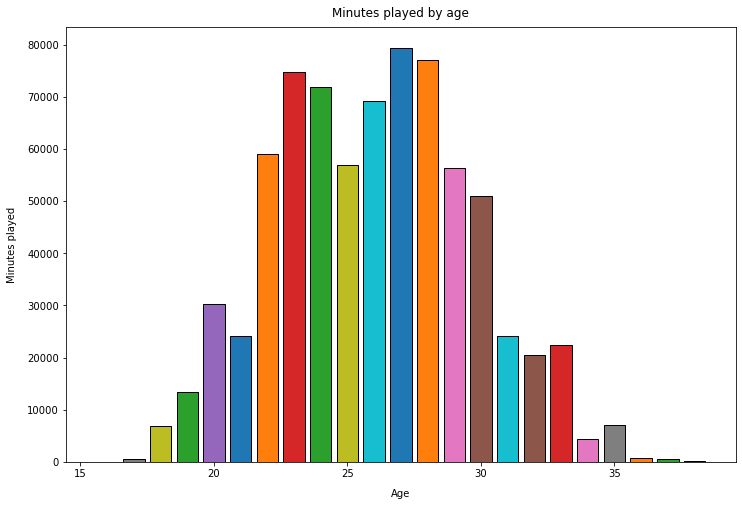

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.ylabel("Minutes played", labelpad=10)
plt.xlabel("Age", labelpad=10)
plt.title('Minutes played by age', pad=10)

dic = {}

c = 0
for age in df['Age']:
    if age not in dic:
        dic[age] = df['Mins'][c]
    else:
        dic[age] += df['Mins'][c]
    c += 1

for age, mins in dic.items():
    plt.bar(age, mins, ec='black')

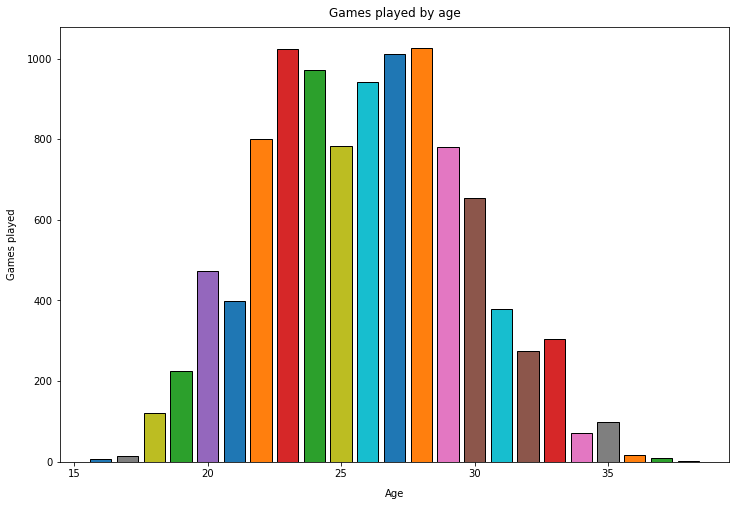

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.ylabel("Games played", labelpad=10)
plt.xlabel("Age", labelpad=10)
plt.title('Games played by age', pad=10)

dic = {}

c = 0
for age in df['Age']:
    if age not in dic:
        dic[age] = df['Matches'][c]
    else:
        dic[age] += df['Matches'][c]
    c += 1

for age, mins in dic.items():    plt.bar(age, mins, ec='black')

219 playing MF
176 playing FW
42 playing GK
218 playing DF


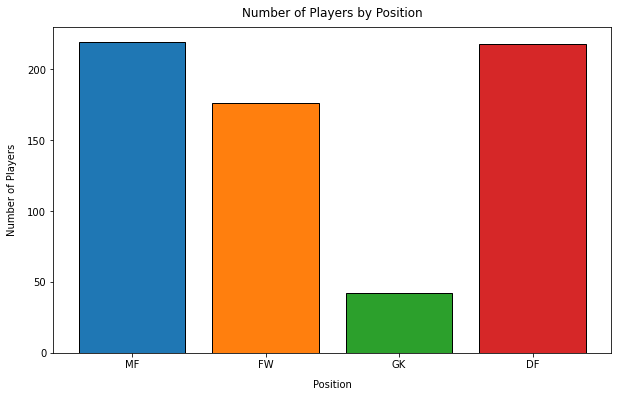

MF play 0.16 games in average
FW play 0.18 games in average
GK play 0.83 games in average
DF play 0.12 games in average


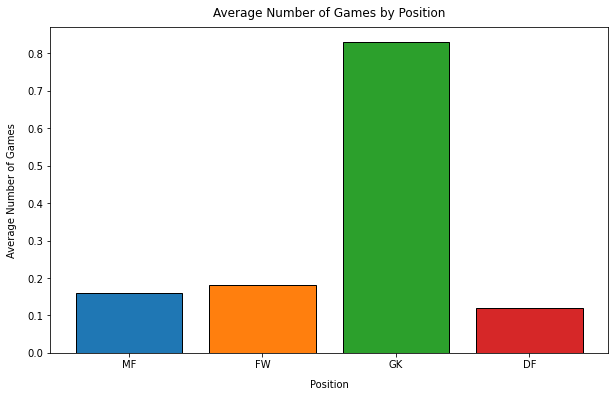

MF : 403 Goals
FW : 660 Goals
GK : 1 Goals
DF : 165 Goals


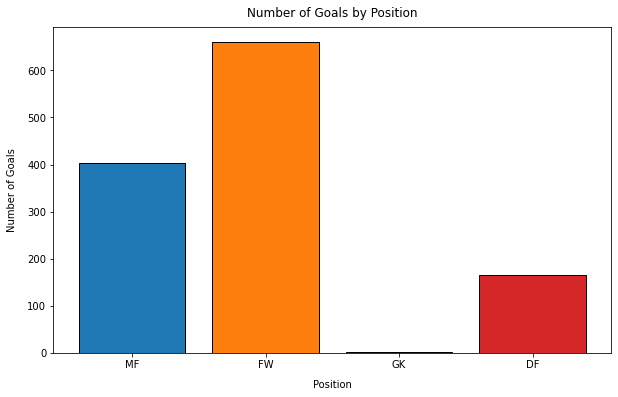

MF : 359 Assists
FW : 355 Assists
GK : 2 Assists
DF : 182 Assists


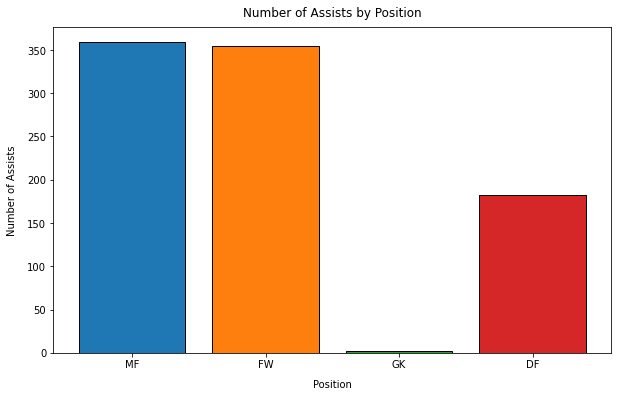

MF : 540 Yellow Cards
FW : 234 Yellow Cards
GK : 31 Yellow Cards
DF : 532 Yellow Cards


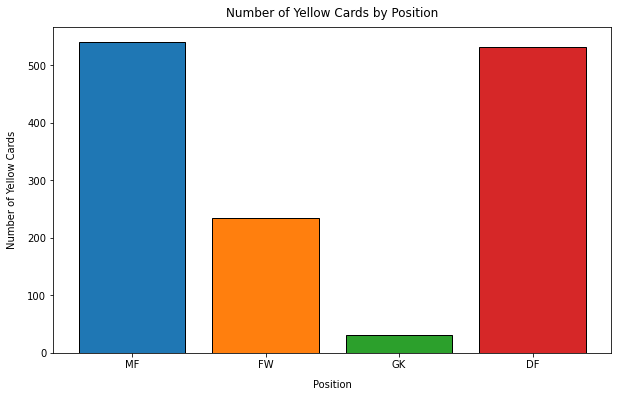

MF : 70 Penalty Attempted
FW : 73 Penalty Attempted
GK : 0 Penalty Attempted
DF : 5 Penalty Attempted


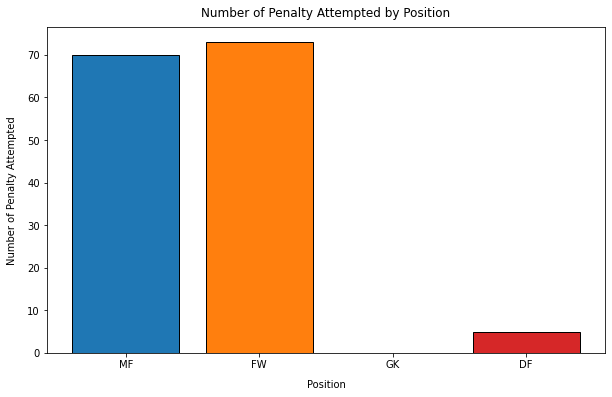

In [ ]:
def single(stat):
    positions = {}    
    c = 0
    for pos in df['Position']:
    
        if len(pos) > 2:
            lst = pos.split(',')
            for x in lst:
                if x not in positions:
                    positions[x] = df[stat][c]
                else:
                    positions[x] += df[stat][c] 

        elif pos not in positions:
            positions[pos] = df[stat][c]
        elif pos in positions:
            positions[pos] += df[stat][c]
        c += 1
    
    if '_' in stat:
            stat = stat.replace('_', ' ')
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel("Position", labelpad=10)
    plt.ylabel(f"Number of {stat}", labelpad=10)
    plt.title(f"Number of {stat} by Position", pad=10)

    for pos, freq in positions.items():
        plt.bar(pos, freq, ec='black')
        print(f'{pos} : {freq} {stat}')

#---------------------------------------------------------------------   
#nb of players by position
fig, ax = plt.subplots(figsize=(10, 6))
plt.xlabel("Position", labelpad=10)
plt.ylabel("Number of Players", labelpad=10)
plt.title("Number of Players by Position", pad=10)

positions = {}
for pos in df['Position']:
    
    if len(pos) > 2:
        lst = pos.split(',')
        for x in lst:
            if x not in positions:
                positions[x] = 1
            else:
                positions[x] += 1 
    
    elif pos not in positions:
        positions[pos] = 1
    elif pos in positions:
        positions[pos] += 1
for pos, freq in positions.items():
    plt.bar(pos, freq, ec='black')
    print(f'{freq} playing {pos}')
plt.show()
#---------------------------------------------------------------------
#nb of average matches played by position
fig, ax = plt.subplots(figsize=(10, 6))
plt.xlabel("Position", labelpad=10)
plt.ylabel("Average Number of Games", labelpad=10)
plt.title("Average Number of Games by Position", pad=10)

positions = {}
matches = {}
for pos in df['Position']:
    if len(pos) > 2:
        lst = pos.split(',')
        for x in lst:
            if x not in positions:
                positions[x] = 1
            else:
                positions[x] += 1 
    
    elif pos not in positions:
        positions[pos] = 1
    elif pos in positions:
        positions[pos] += 1

c = 0
for pos in positions.keys():
    if pos not in matches:
        matches[pos] = df['Matches'][c]
    elif pos in matches:
        matches[pos] += df['Matches'][c]
    c += 1
        
for pos, freq in positions.items():
    avrGame = round((matches[pos]/freq), 2)
    plt.bar(pos, avrGame, ec='black')
    print(f'{pos} play {avrGame} games in average')

plt.show()
#---------------------------------------------------------------------
single('Goals')
plt.show()

single('Assists')
plt.show()

single('Yellow_Cards')
plt.show()

single('Penalty_Attempted')
plt.show()